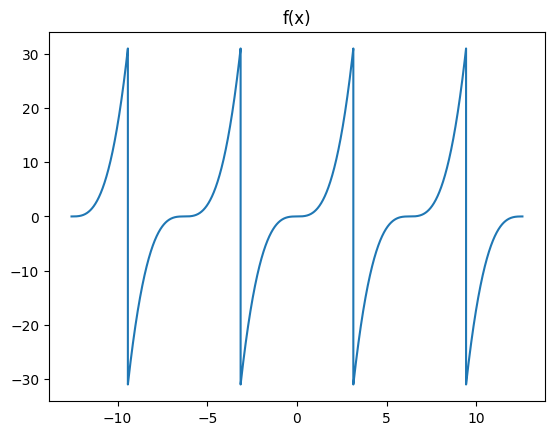

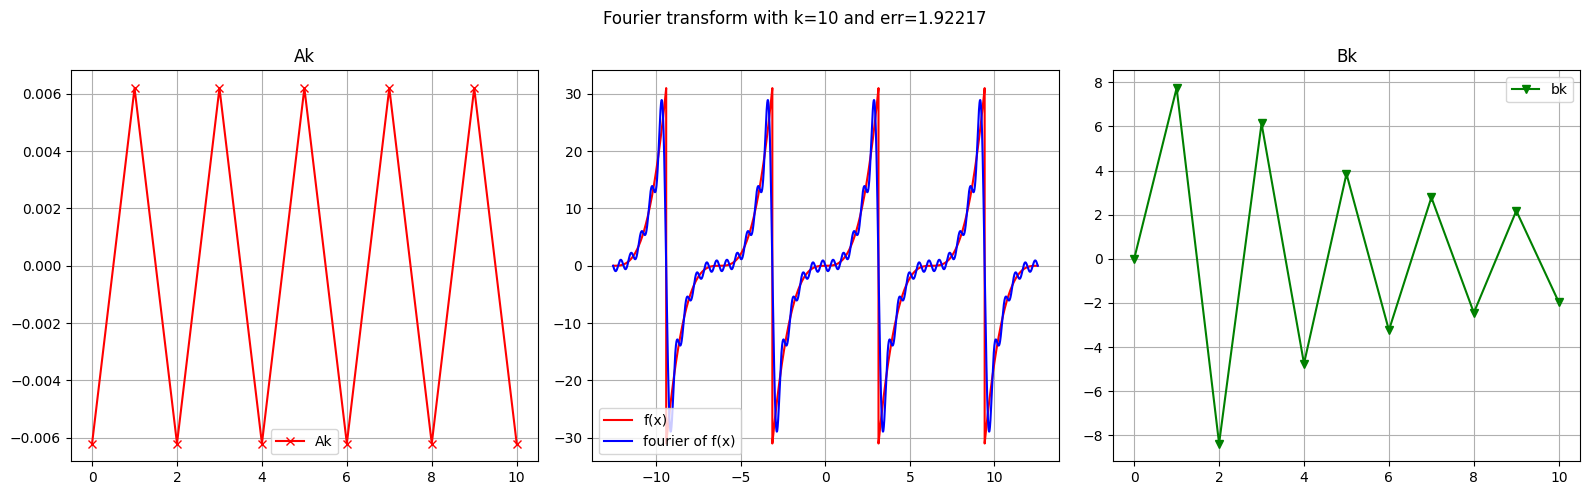

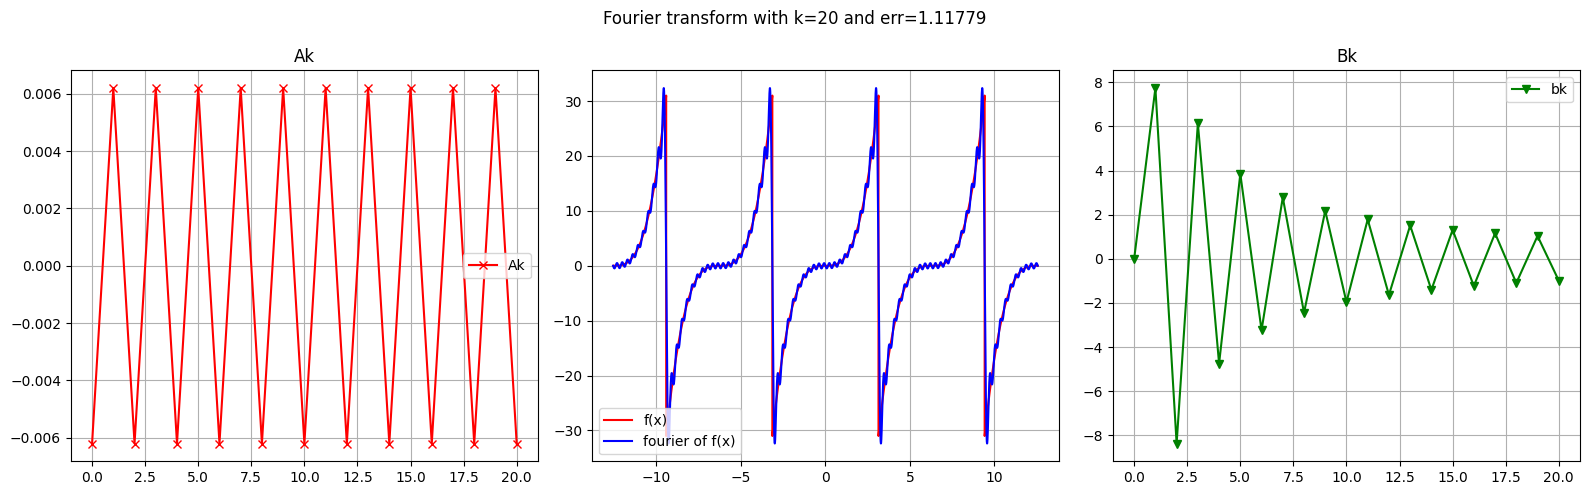

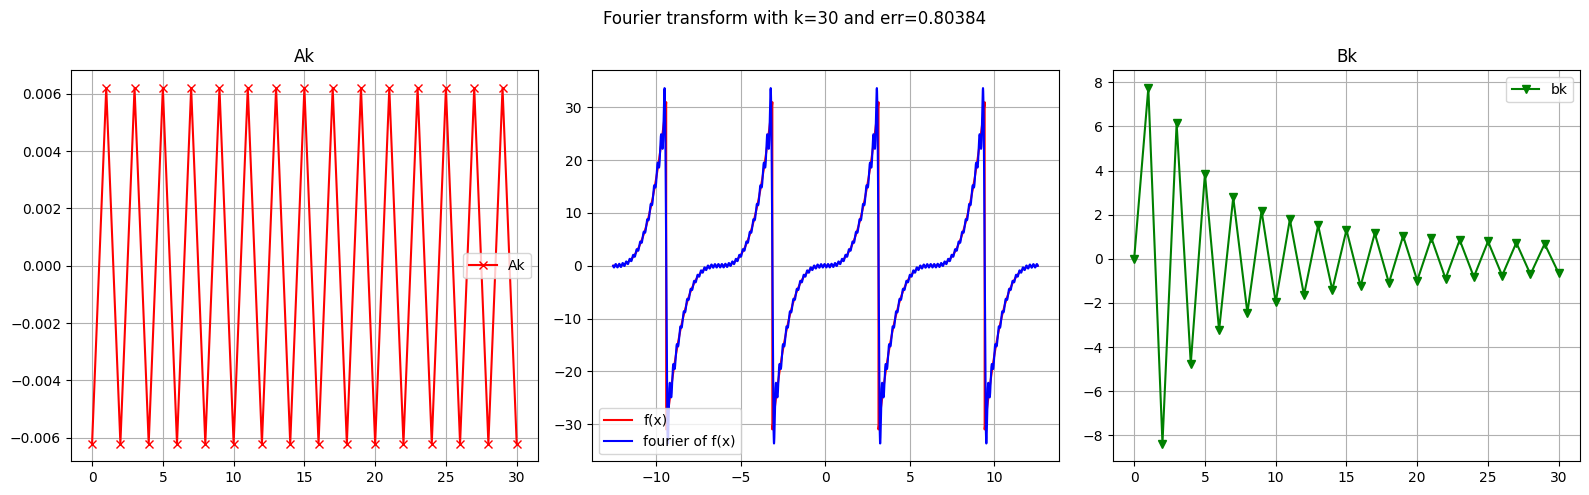

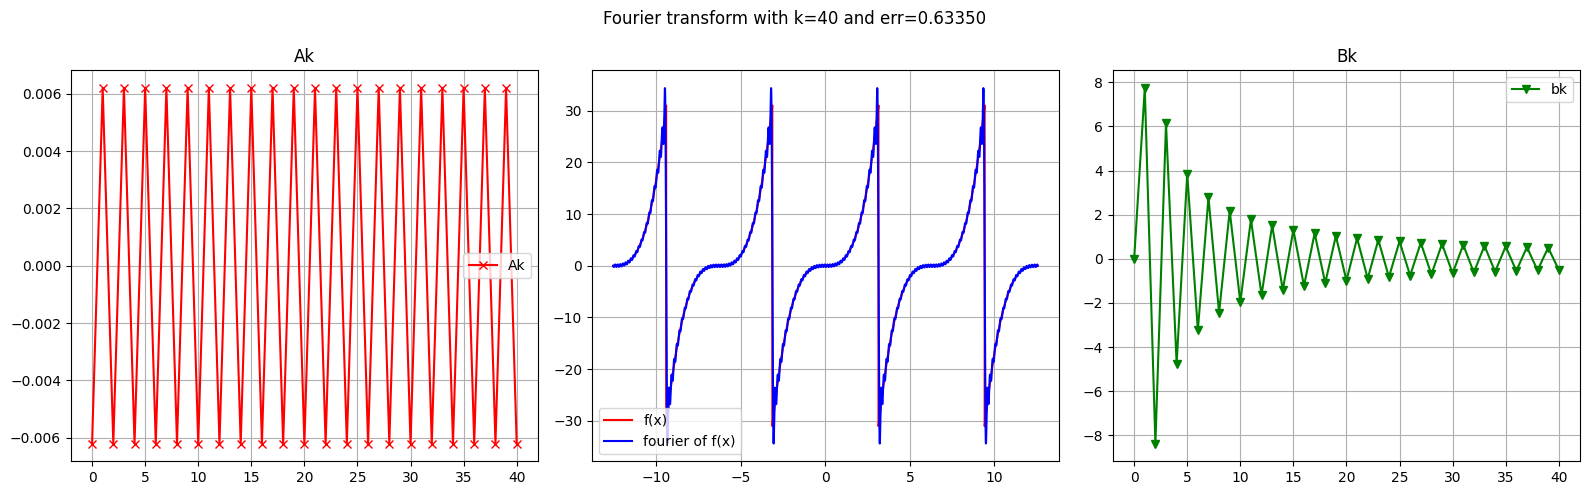

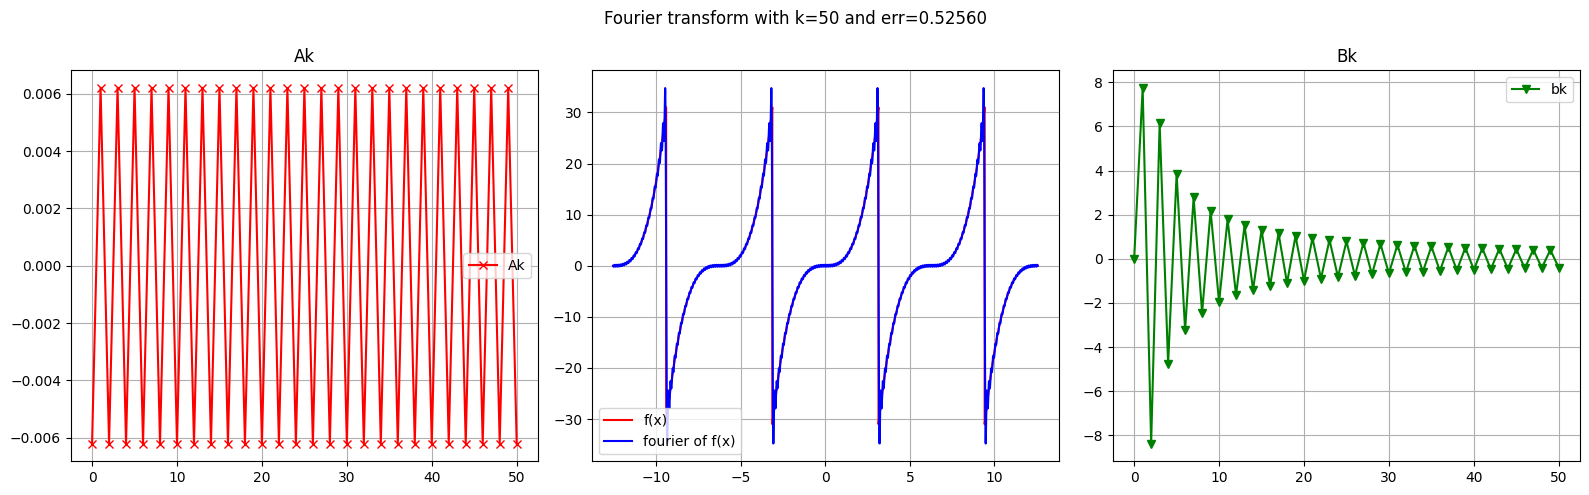

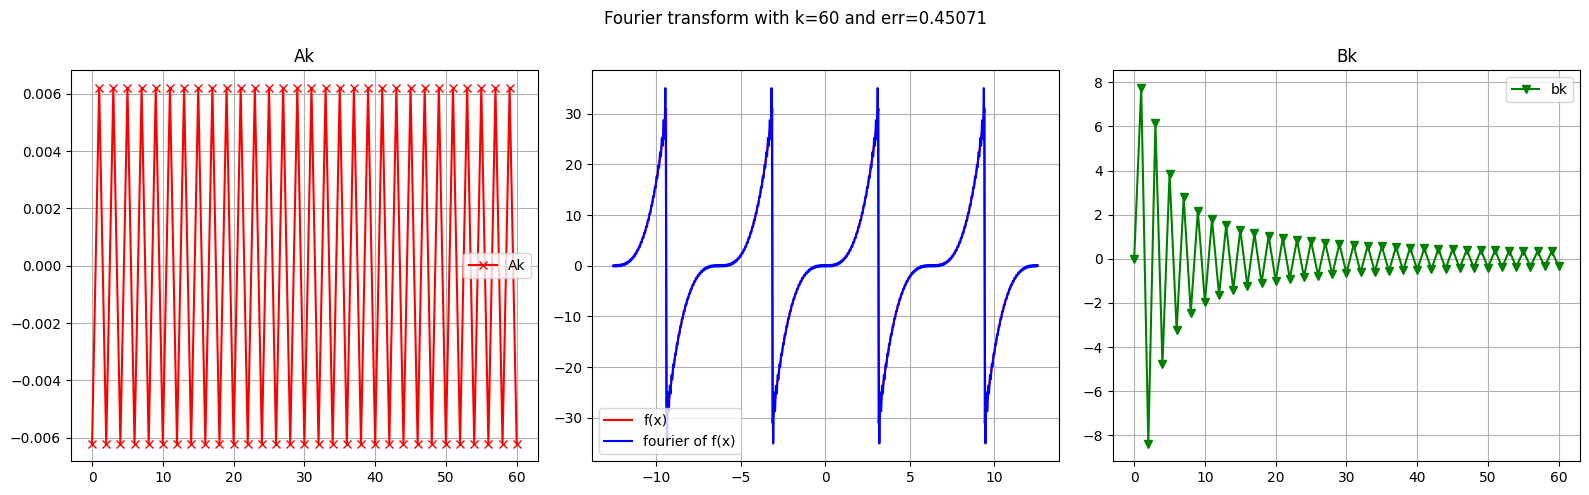

time it took:  8.311151504516602 second


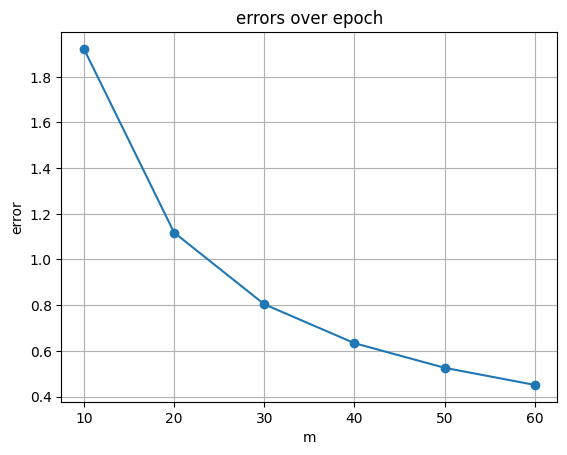

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

def function(x,l):
  '''define the function here '''
  # f = x.copy()
  # f[0:int(len(x)/2)] = - x[0:int(len(x)/2)]

  # f = np.ones_like(x)
  # f[0:int(len(x)/2)] = -1

  # f = np.ones_like(x)
  # f[int(len(x)/2):] = -1

  # f = x.copy()
  # f[0:int(len(x)/2)] = - x[int(len(x)/2):] +np.pi
  # f[int(len(x)/2):] = - x[int(len(x)/2):] +np.pi

  f = x.copy()
  f = f ** 3

  # f = np.abs(np.cos(x))
  # f = np.abs(np.sin(x))

  f = make_periodic(f,l)
  plt.plot(x,f)
  plt.title('f(x)')
  plt.show()
  return f

def make_periodic(f,lim):
  f_tem = f
  half = int(len(f) / 2)
  quarter = int(len(f) / (2*lim))
  neg = f[half-quarter:half]
  pos = f[half:half+quarter]

  for step in range(1,lim):
    if step % 2 == 1:
      f_tem[half+step*quarter:half+(step+1)*quarter] = neg
      f_tem[half-(step+1)*quarter:half-step*quarter] = pos
    else:
      f_tem[half+step*quarter:half+(step+1)*quarter] = pos
      f_tem[half-(step+1)*quarter:half-step*quarter] = neg

  return f_tem

# variables to define
dx = 0.0001 # step in the graph
lim = 4 # limits in the domain
factor = 1
L = np.pi # the peirod

x = np.arange(-(lim),lim,dx) * np.pi # the x domain
half = int(len(x) / 2)
quarter = int(len(x) / (2*lim))
f = function(x,lim) # define the functtion
m_values = [10*n for n in range(1,7)]
errs = []

start = time.time()
for m in m_values:
  A = np.zeros(m+1)
  B = np.zeros(m+1)
  A[0] = np.sum(f[half-quarter:half+quarter+1])*dx
  Ff = A[0] / 2

  for n in range(1,m+1):
    A[n] = np.sum(f[half-quarter:half+quarter+1] * np.cos(factor*np.pi * n * x[half-quarter:half+quarter+1]/L)) * dx
    B[n] = np.sum(f[half-quarter:half+quarter+1] * np.sin(factor*np.pi * n * x[half-quarter:half+quarter+1]/L)) * dx

    Ff += A[n]*np.cos(factor*np.pi*n*x / L) + B[n]*np.sin(factor*np.pi*n*x / L)

  err = np.mean(np.abs(Ff - f))
  errs.append(err)
  fig,ax = plt.subplots(1,3,figsize=(16,5))

  ax[1].plot(x,f,color="red",label="f(x)")
  ax[1].plot(x,Ff,color="blue",label="fourier of f(x)")
  ax[1].grid()
  ax[1].legend()

  li = np.arange(m+1)
  ax[0].plot(li,A,color='r',marker='x',label="Ak")
  ax[0].grid()
  ax[0].legend()
  ax[0].set_title('Ak')

  ax[2].plot(li,B,color='g',marker='v',label="bk")
  ax[2].grid()
  ax[2].legend()
  ax[2].set_title('Bk')

  fig.suptitle(f"Fourier transform with k={m} and err={err:.5f}")
  plt.tight_layout()
  plt.show()

end = time.time()

plt.figure()
plt.plot(m_values,errs,
         marker='o'
         )
plt.grid()
plt.title('errors over epoch')
plt.ylabel('error')
plt.xlabel('m')
plt.show()

print("time it took: ",(end - start),"second")